In [20]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss
from sklearn.cross_validation import train_test_split

In [4]:
df = pd.read_csv('gbm-data.csv')

In [5]:
df.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3751 entries, 0 to 3750
Columns: 1777 entries, Activity to D1776
dtypes: float64(942), int64(835)
memory usage: 50.9 MB


In [37]:
X = df.drop('Activity', axis=1).values
y = df['Activity'].values

print('X shape - {}, y shape - {}'.format(X.shape, y.shape))

X_train, X_test, y_train, y_test = \
    train_test_split(X, y,test_size=0.8, random_state=421)

X shape - (3751, 1776), y shape - (3751,)


In [44]:
GBclf = GradientBoostingClassifier(learning_rate=0.2, n_estimators=250,
                                      random_state=241, verbose=True)
GBclf.fit(X_train, y_train)                  

      Iter       Train Loss   Remaining Time 
         1           1.2321           14.57s
         2           1.1375           14.03s
         3           1.0711           14.52s
         4           1.0189           14.57s
         5           0.9802           14.49s
         6           0.9458           14.35s
         7           0.9208           14.26s
         8           0.8871           14.26s
         9           0.8548           14.17s
        10           0.8327           13.97s
        20           0.6661           13.11s
        30           0.5657           12.37s
        40           0.4921           11.73s
        50           0.4289           11.14s
        60           0.3817           10.53s
        70           0.3367            9.94s
        80           0.3026            9.36s
        90           0.2615            8.80s
       100           0.2392            8.36s
       200           0.0793            2.75s
staged_decision_function
[24, 0.5399423689317281]


In [84]:
res_test = []
for i, y_pred in enumerate(GBclf.staged_decision_function(X_test)):
    loss = log_loss(y_test, 1.0/(1.0 + np.exp(-y_pred)))
    res_test.append(loss)
    #print('n_estimators = {}, log_loss = {}'.format(i, loss))

res_train = []
for i, y_pred in enumerate(GBclf.staged_decision_function(X_train)):
    loss = log_loss(y_train, 1.0/(1.0 + np.exp(-y_pred)))
    res_train.append(loss)    

In [34]:
"""
learn_rate = [1, 0.5, 0.3, 0.2, 0.1] 

for k in learn_rate:
    print('\nlearn_rate = ', k)
    GBclf = GradientBoostingClassifier(learning_rate=k, n_estimators=250,
                                      random_state=241, verbose=True)
    GBclf.fit(X_train, y_train)
    for i, y_pred in enumerate(clf.staged_decision_function(X_test)):
        

array([1, 1, 1, ..., 0, 1, 0])

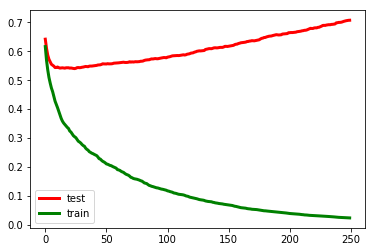

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(res_test, 'r', linewidth=3)
plt.plot(res_train, 'g', linewidth=3)
plt.legend(['test', 'train'])

In [57]:
from sklearn.ensemble import RandomForestClassifier

RFclf = RandomForestClassifier(n_estimators=36, random_state=241)
RFclf.fit(X_train, y_train)

print('log_loss:', log_loss(y_test, RFclf.predict_proba(X_test)))